In [ ]:
##################################################################
########################## Problem 1 #############################
##################################################################

In [1]:
from torchvision import models
from torchvision import transforms
from PIL import Image
import torch

C:\Users\tyler\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\tyler\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
resnet = models.resnet101(pretrained=True)

In [3]:
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

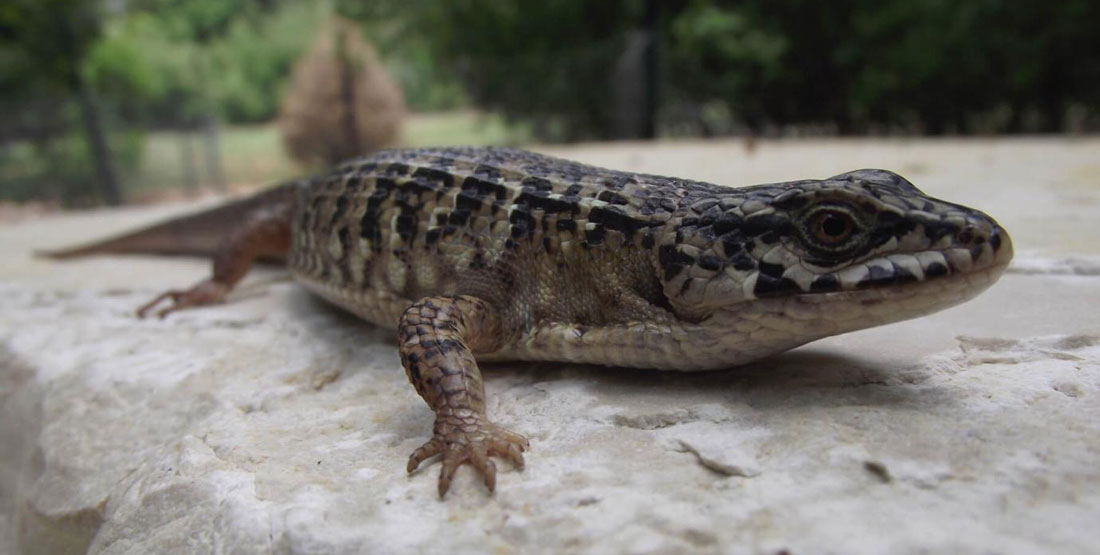

In [4]:
img = Image.open("AlligatorLizard.jpg")
img

In [5]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('alligator lizard', 94.71525573730469)

In [6]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('alligator lizard', 94.71525573730469),
 ('whiptail, whiptail lizard', 3.0680336952209473),
 ('banded gecko', 1.1484079360961914),
 ('common newt, Triturus vulgaris', 0.19391697645187378),
 ('African crocodile, Nile crocodile, Crocodylus niloticus',
  0.19033555686473846)]

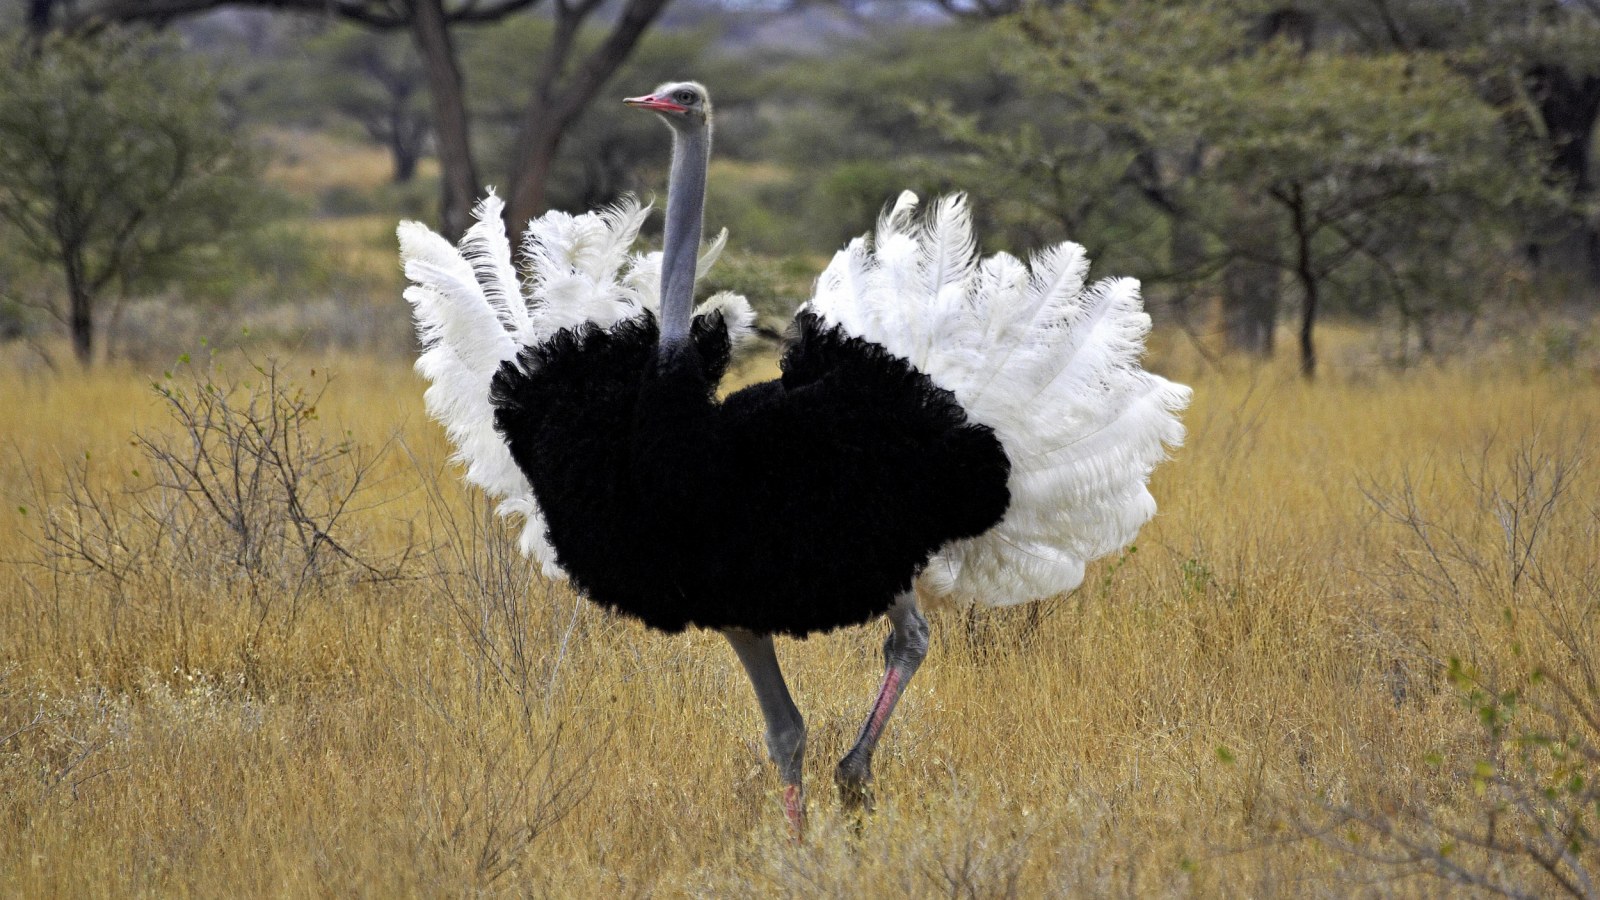

In [7]:
img = Image.open("ostrich.jpg")
img

In [8]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('ostrich, Struthio camelus', 99.98768615722656)

In [9]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('ostrich, Struthio camelus', 99.98768615722656),
 ('bustard', 0.01039576344192028),
 ('crane', 0.0005815675249323249),
 ('black swan, Cygnus atratus', 0.00044144189450889826),
 ('vulture', 0.00018743147666100413)]

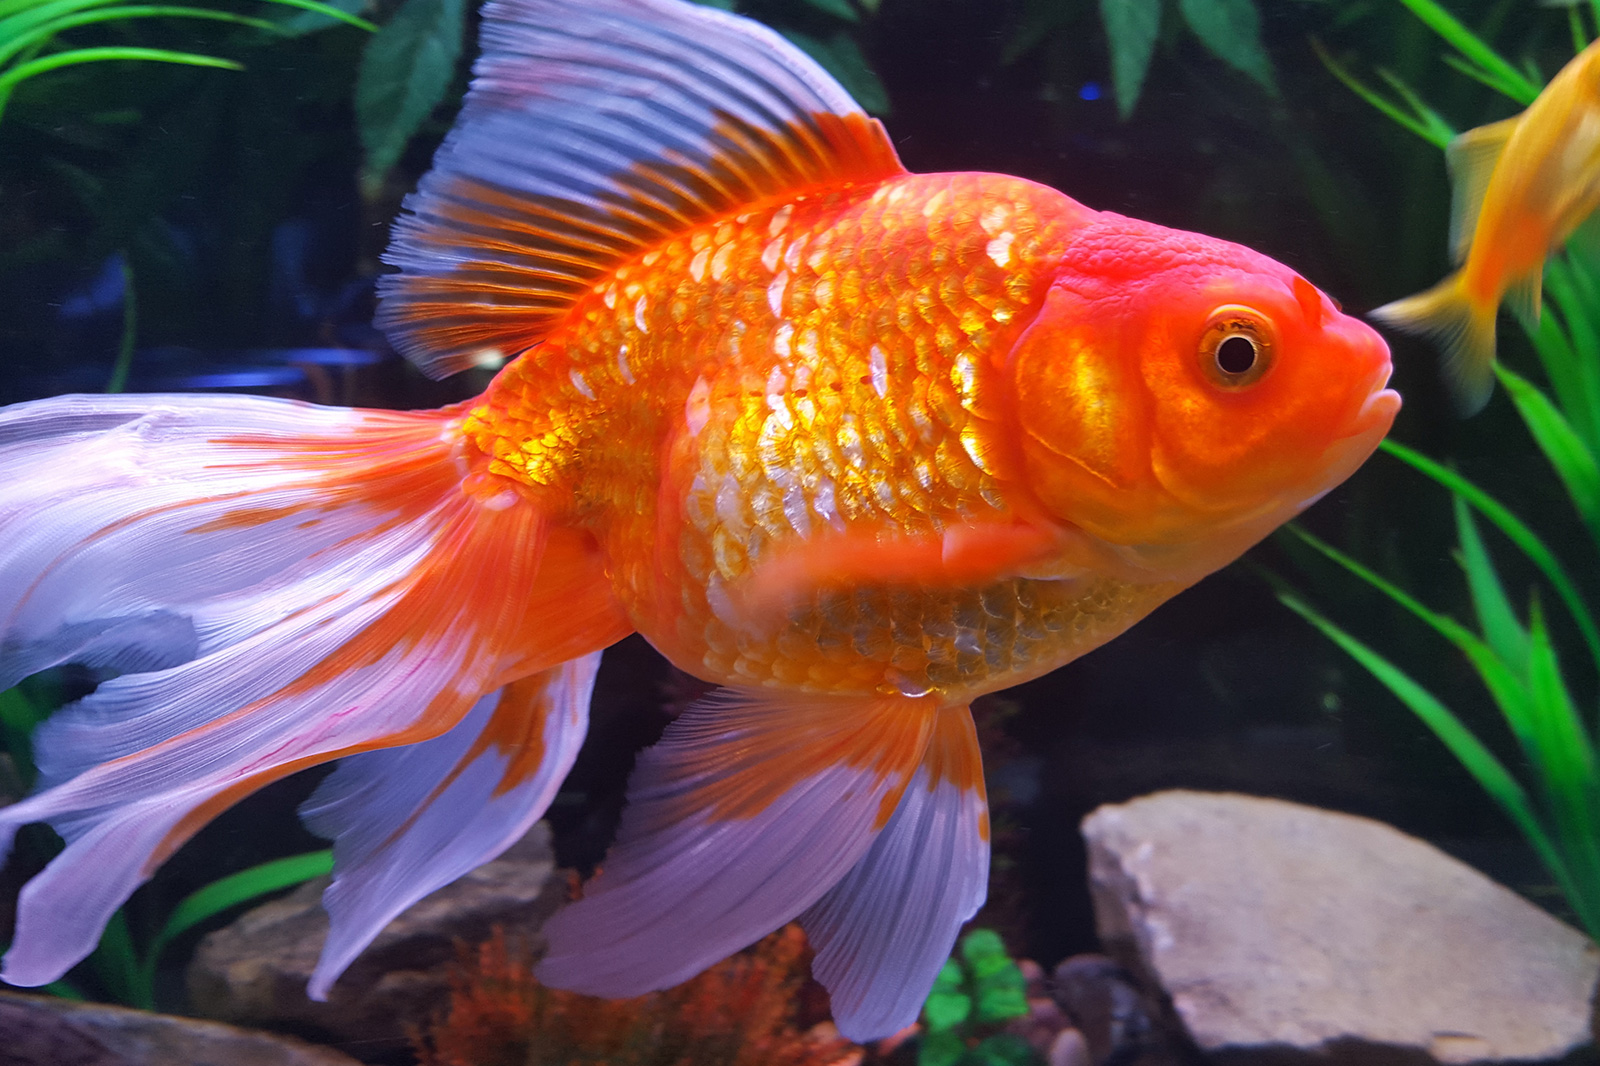

In [10]:
img = Image.open("goldfish.jpg")
img

In [11]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('goldfish, Carassius auratus', 99.99700927734375)

In [12]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('goldfish, Carassius auratus', 99.99700927734375),
 ('lorikeet', 0.001153591787442565),
 ('rock beauty, Holocanthus tricolor', 0.0005360020441003144),
 ('anemone fish', 0.00039433088386431336),
 ('flamingo', 0.0003240118967369199)]

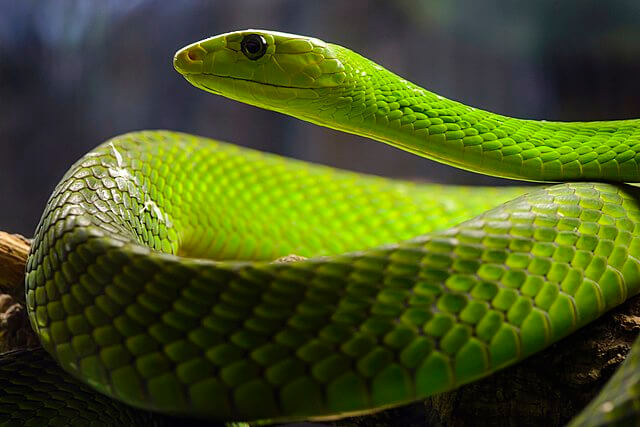

In [13]:
img = Image.open("greenmamba.jpg")
img

In [14]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('green mamba', 94.59886169433594)

In [15]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('green mamba', 94.59886169433594),
 ('green snake, grass snake', 5.272824287414551),
 ('vine snake', 0.08228501677513123),
 ('night snake, Hypsiglena torquata', 0.031026199460029602),
 ('Indian cobra, Naja naja', 0.0074167270213365555)]

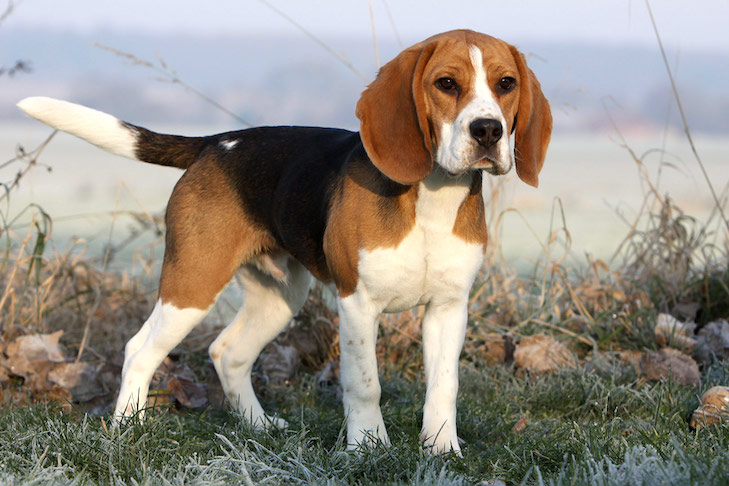

In [16]:
img = Image.open("beagle.jpg")
img

In [17]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('beagle', 82.22325134277344)

In [18]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('beagle', 82.22325134277344),
 ('English foxhound', 8.855939865112305),
 ('Walker hound, Walker foxhound', 7.2283453941345215),
 ('bloodhound, sleuthhound', 0.6057491302490234),
 ('basset, basset hound', 0.6029900312423706)]

In [ ]:
##################################################################
########################## Problem 2 #############################
##################################################################

In [19]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [20]:
netG = ResNetGenerator()
model_path = 'horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [21]:
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([transforms.Resize(256),
transforms.ToTensor()])

In [22]:
img = Image.open("horse1.jpg")
img

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)

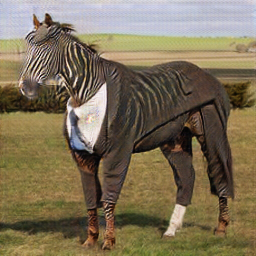

In [23]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

In [24]:
img = Image.open("horse2.jpg")
img

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)

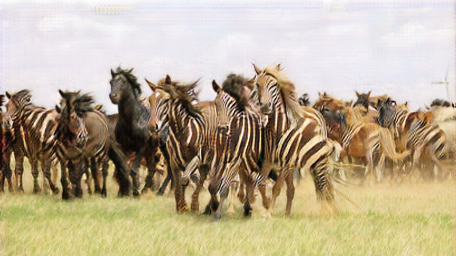

In [25]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

In [26]:
img = Image.open("horse3.jpg")
img

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)

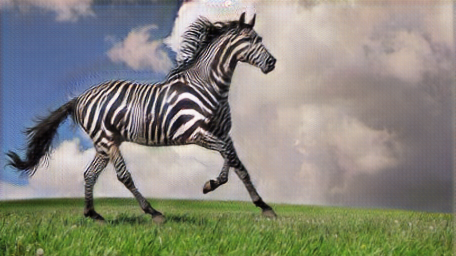

In [27]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

In [28]:
img = Image.open("horse4.jpg")
img

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)

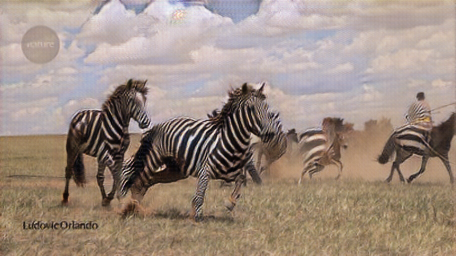

In [29]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

In [30]:
img = Image.open("horse5.jpg")
img

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)

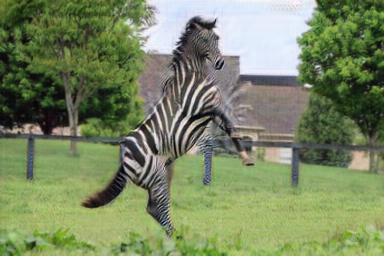

In [31]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

In [ ]:
##################################################################
########################## Problem 3 #############################
##################################################################

In [32]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = models.resnet101()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNet(
  44.549 M, 100.000% Params, 7.85 GMac, 100.000% MACs, 
  (conv1): Conv2d(0.009 M, 0.021% Params, 0.118 GMac, 1.503% MACs, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(0.0 M, 0.000% Params, 0.002 GMac, 0.020% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(0.0 M, 0.000% Params, 0.001 GMac, 0.010% MACs, inplace=True)
  (maxpool): MaxPool2d(0.0 M, 0.000% Params, 0.001 GMac, 0.010% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    0.216 M, 0.484% Params, 0.68 GMac, 8.668% MACs, 
    (0): Bottleneck(
      0.075 M, 0.168% Params, 0.236 GMac, 3.012% MACs, 
      (conv1): Conv2d(0.004 M, 0.009% Params, 0.013 GMac, 0.164% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(0.0 M, 0.000% Params, 0.0 GMac, 0.005% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(0.037 M, 0.0

In [47]:
##################################################################
########################## Problem 4 #############################
##################################################################

In [34]:
import torch
from PIL import Image
from torchvision import transforms
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in C:\Users\tyler/.cache\torch\hub\pytorch_vision_v0.10.0


MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [35]:
# sample execution (requires torchvision)
input_image = Image.open('AlligatorLizard.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-3.2004e-01, -1.4345e-01,  2.5811e-01,  3.2904e+00,  6.5292e-02,
         7.7892e-01, -3.2832e+00,  4.7011e+00,  5.3789e+00,  4.6926e+00,
         4.1210e+00,  8.5376e-01,  2.4589e+00, -1.5780e+00,  1.8793e+00,
         5.9382e-01,  7.2329e-01,  3.2110e+00, -1.0342e+00,  2.5280e-01,
         1.0715e+00,  4.7055e+00,  1.9126e+00,  3.4783e+00,  6.1059e+00,
         7.5982e+00,  1.2311e+01,  7.1262e+00,  5.4124e+00,  9.0957e+00,
         6.9707e+00,  5.3934e+00,  9.0120e+00,  4.0386e+00,  4.4903e+00,
         5.9052e+00,  6.5184e+00,  4.4169e+00,  1.2529e+01,  7.4571e+00,
         1.0192e+01,  1.6894e+01,  1.2381e+01,  9.9785e+00,  1.8785e+01,
         9.1389e+00,  1.0623e+01,  7.3445e+00,  6.3170e+00,  1.0767e+01,
         1.1315e+01,  3.5138e+00,  7.9969e+00,  2.3378e+00,  6.0104e+00,
         5.6448e-01,  4.8237e+00,  5.6522e+00,  3.8331e+00,  4.0437e+00,
         7.5469e+00,  4.8797e+00,  8.0588e+00,  7.3732e+00,  4.8832e+00,
         2.6478e+00,  5.8726e+00,  6.6832e+00,  5.9

In [37]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

alligator lizard 0.8634473085403442
whiptail, whiptail lizard 0.13025343418121338
banded gecko 0.001655799220316112
agama 0.001428026705980301
common newt, Triturus vulgaris 0.001331590348854661


In [38]:
# sample execution (requires torchvision)
input_image = Image.open('ostrich.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-4.2080e+00,  1.4788e+00, -4.9615e+00, -4.4730e+00, -2.7433e+00,
        -4.7030e-02, -2.2140e+00,  1.3575e+01,  1.4037e+01,  2.1372e+01,
        -6.6075e-01,  3.2334e+00, -1.2824e+00,  1.4870e+00, -1.1861e+00,
        -2.1794e+00, -6.5015e-01,  1.7078e+00,  8.5324e+00,  2.3985e+00,
         4.2924e+00,  4.1180e+00,  6.7148e+00,  9.8429e+00,  4.7208e-01,
         2.1450e-01,  9.7465e-02, -9.0128e-01, -1.6600e+00,  3.7349e+00,
        -3.6382e+00, -2.3714e+00, -9.9947e-01, -2.9323e+00, -2.1522e-01,
        -2.5395e+00,  6.4805e-01, -5.3434e+00,  7.9354e-01, -1.2263e-01,
        -3.1179e+00, -1.3916e+00, -1.5103e-01,  1.1017e-01, -5.2221e-01,
        -5.3265e-01, -2.1211e+00, -1.2770e+00, -4.3647e+00, -1.2302e+00,
        -2.2703e+00, -5.4789e-01,  4.0229e+00,  9.4473e-01,  1.1939e-01,
        -1.6733e+00,  2.0830e+00,  1.1826e+00,  1.9013e-01, -1.2694e+00,
         2.6733e+00, -2.3069e+00,  6.4157e-01,  2.1594e+00, -3.1003e+00,
         2.3590e+00,  3.3486e+00,  1.1232e+00,  1.7

In [39]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

ostrich, Struthio camelus 0.9970390796661377
hen 0.0006501088500954211
crane 0.0005967088509351015
cock 0.0004097085911780596
black swan, Cygnus atratus 0.00034187670098617673


In [40]:
# sample execution (requires torchvision)
input_image = Image.open('goldfish.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 1.3512e+01,  3.2041e+01,  1.4061e+00,  3.7612e+00,  3.8834e+00,
         6.8513e+00,  3.5374e+00,  9.0197e+00,  6.2762e+00, -2.9318e+00,
         3.4811e+00,  4.6231e+00,  5.9615e+00, -1.5800e+00,  1.6875e+00,
         2.3028e+00,  2.5636e+00,  5.6489e-01,  5.5996e-01, -1.1555e+00,
        -6.7587e-01,  6.0456e+00,  2.8015e+00,  4.8060e+00,  1.9484e+00,
         2.3493e+00,  4.8514e+00,  5.2986e+00,  3.0655e+00,  1.1608e+01,
         5.5556e+00,  1.5970e+00,  5.8218e+00,  9.1060e+00,  8.2761e+00,
         7.7118e+00,  8.1435e+00,  5.7420e+00,  7.4003e+00,  3.3621e+00,
         2.4127e+00,  4.7157e+00,  4.2836e+00,  5.0668e+00,  4.1143e+00,
         3.0714e+00,  2.4220e+00,  4.9859e+00,  4.4992e+00,  4.7150e+00,
         4.4299e+00,  7.2727e+00,  2.7142e+00,  3.4288e+00,  4.4922e+00,
         3.0588e+00,  4.4605e+00,  8.6510e-01,  7.3536e+00,  1.0104e+00,
         7.6557e+00,  3.8973e+00,  5.4007e+00,  6.6574e+00,  3.9119e+00,
         4.5750e+00,  4.2056e+00,  7.8710e+00,  3.7

In [41]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

goldfish, Carassius auratus 1.0
lorikeet 1.8579825677988993e-08
flamingo 1.0648190773565602e-08
tench, Tinca tinca 8.969155196325573e-09
rock beauty, Holocanthus tricolor 7.89552956348416e-09


In [42]:
# sample execution (requires torchvision)
input_image = Image.open('greenmamba.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 2.0037e+00,  6.0929e+00,  5.1013e-01,  2.5606e+00,  1.0100e+00,
         5.1151e-01,  3.6377e+00,  3.1793e-01, -2.1500e-01, -8.5183e-01,
        -5.4311e+00,  1.9378e+00, -8.4941e-01, -7.5310e+00, -1.3003e+00,
        -7.8774e-01,  1.2319e+00, -2.1221e+00, -6.9300e-01, -1.8580e+00,
        -5.2714e+00, -6.7631e-01, -6.5219e-01, -7.0008e+00, -5.0598e+00,
         4.6507e-02,  1.9346e+00, -2.3823e-01, -1.1266e-01,  2.0765e+00,
         4.9804e+00,  7.4867e+00,  2.8007e+00, -8.2588e-01, -8.7053e-01,
        -1.8922e+00, -1.8174e+00, -3.7094e+00,  6.1756e+00,  8.7880e+00,
         1.2637e+01,  5.2084e+00,  4.0245e+00,  2.5608e+00,  7.9514e+00,
         1.0482e-01,  1.4385e+01,  7.0567e+00,  5.3634e+00,  3.0692e-02,
         1.4257e+00, -3.2451e+00,  1.1374e+01,  8.7963e+00,  1.3481e+01,
         2.5620e+01,  1.2294e+01,  8.4107e+00,  9.6064e+00,  2.2514e+01,
         1.8370e+01,  1.2028e+01,  1.2394e+01,  1.3056e+01,  2.8058e+01,
         1.1506e+01,  1.4252e+01,  1.3851e+01,  1.4

In [43]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

green mamba 0.9163060784339905
green snake, grass snake 0.08004775643348694
vine snake 0.0035843008663505316
night snake, Hypsiglena torquata 5.6809494708431885e-05
sidewinder, horned rattlesnake, Crotalus cerastes 1.0603870350678335e-06


In [44]:
# sample execution (requires torchvision)
input_image = Image.open('beagle.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.4642e+00, -9.1595e-01, -2.4745e+00, -5.2905e+00, -5.2270e+00,
        -2.9832e+00, -3.2649e+00,  9.3252e-01,  3.3728e-01, -4.1118e+00,
         8.2735e-01, -4.4882e+00, -5.6315e+00, -2.2133e+00, -3.9459e+00,
        -6.1756e-01, -4.8756e+00, -5.8024e+00, -2.4138e+00, -4.4871e+00,
        -1.2893e+00, -2.2507e+00, -2.0901e+00, -1.9460e+00, -3.5534e+00,
        -3.2584e+00, -2.1890e+00, -1.9349e+00, -4.9547e+00, -4.1193e+00,
        -2.6244e+00, -2.8359e+00, -2.6475e+00, -1.1710e+00, -1.8844e+00,
        -2.0055e+00,  7.3607e-01, -1.9443e+00, -2.0343e-01,  1.0523e+00,
         4.1538e-01, -8.5189e-01,  2.1758e+00, -1.1881e+00, -1.4096e+00,
        -5.6492e-01, -4.5662e-01, -2.8766e+00, -3.9623e+00, -1.0438e+00,
        -2.1819e+00, -2.6014e+00, -7.5506e-01, -4.8932e-01, -8.2795e-01,
        -2.8765e+00,  3.0094e-01, -3.0529e+00,  4.9352e-01, -7.7393e-01,
        -1.7271e-01, -1.4544e+00,  1.1712e+00,  3.5269e-01, -2.3582e+00,
        -2.5489e+00, -1.5438e+00, -1.3981e+00, -2.1

In [45]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

beagle 0.9034392833709717
English foxhound 0.06653374433517456
Walker hound, Walker foxhound 0.02179107256233692
basset, basset hound 0.007554587908089161
bloodhound, sleuthhound 0.00030261173378676176


In [46]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = models.MobileNetV2()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

MobileNetV2(
  3.505 M, 100.000% Params, 0.32 GMac, 100.000% MACs, 
  (features): Sequential(
    2.224 M, 63.451% Params, 0.319 GMac, 99.600% MACs, 
    (0): ConvNormActivation(
      0.001 M, 0.026% Params, 0.012 GMac, 3.760% MACs, 
      (0): Conv2d(0.001 M, 0.025% Params, 0.011 GMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(0.0 M, 0.002% Params, 0.001 GMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0.0 M, 0.000% Params, 0.0 GMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
      (conv): Sequential(
        0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
        (0): ConvNormActivation(
          0.0 M, 0.010% Params, 0.005 GMac, 1.504% MACs, 
          (0): Conv2d(0.0 M, 0.008% Params, 0.004 GMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)